<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

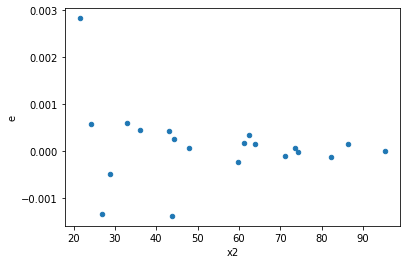

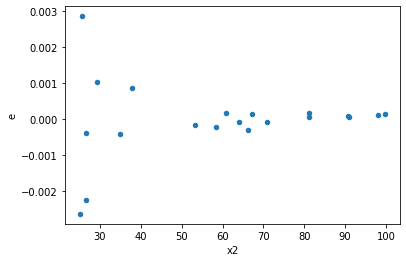

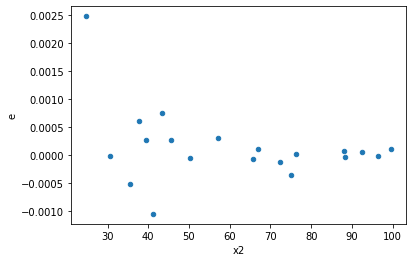

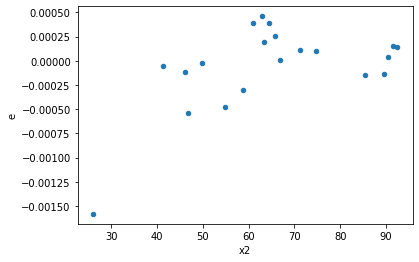

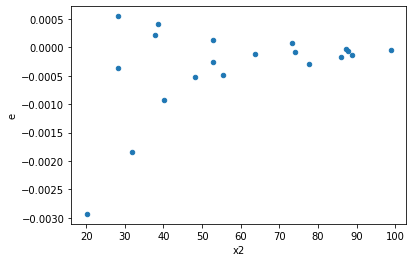

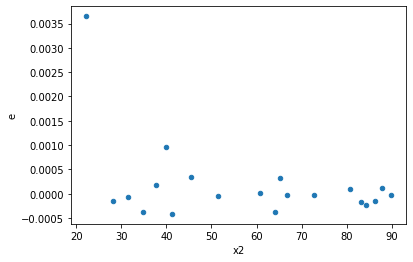

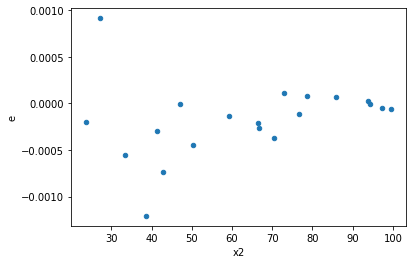

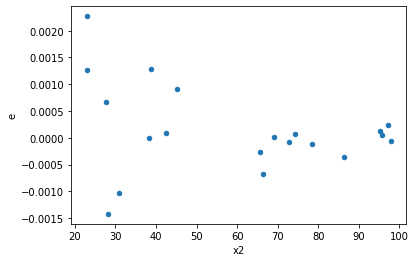

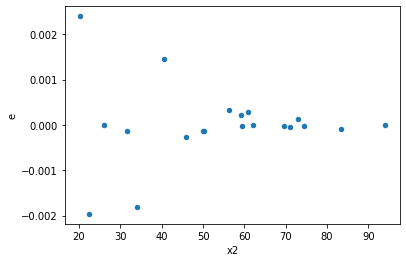

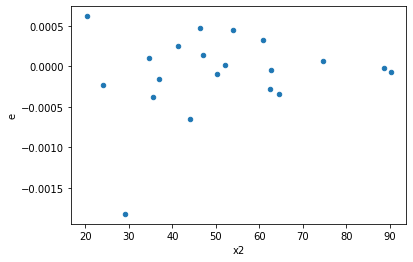

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,10.0,8.131210980457298e-08,7.214636552485358e-06,1.3552018300762163e-08,7.214636552485359e-07,53.236620497181654,1.02861832895762e-06,0.9999994856908355,5.1430916447881e-07,Reject001=0 : Heteroscedasticity
3.0,12.0,4.0,9.270341819524938e-07,6.065215211085698e-07,7.725284849604116e-08,1.5163038027714245e-07,1.9627804440753118,0.5399011040289059,0.730049447985547,0.26995055201445295,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,3.750656109610746e-07,8.57996107561239e-06,4.6883201370134325e-08,1.0724951344515488e-06,22.875893776630043,0.00019450087981764952,0.9999027495600912,9.725043990882476e-05,Reject001=0 : Heteroscedasticity
6.0,7.0,9.0,9.180002308104927e-08,2.6102263886894793e-06,1.3114289011578466e-08,2.9002515429883106e-07,22.115202283766276,0.00011034510576757306,0.9999448274471162,5.517255288378653e-05,Reject001=0 : Heteroscedasticity
7.0,11.0,5.0,9.78609106699144e-07,9.943385062129854e-06,8.896446424537673e-08,1.988677012425971e-06,22.353610841075994,0.0030464154558129675,0.9984767922720935,0.0015232077279064837,Reject001=0 : Heteroscedasticity
8.0,5.0,11.0,1.0803268041163455e-07,1.5052901303196435e-05,2.160653608232691e-08,1.3684455730178577e-06,63.33479683201877,1.9704476561521744e-07,0.9999999014776172,9.852238280760872e-08,Reject001=0 : Heteroscedasticity
9.0,1.0,15.0,2.747305921184421e-24,4.635543766927461e-06,2.747305921184421e-24,3.090362511284974e-07,1.12487018189538e+17,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,12.0,4.0,1.304312187955202e-06,2.81090643264769e-06,1.0869268232960016e-07,7.027266081619225e-07,6.465261442633013,0.08563049211475393,0.957184753942623,0.042815246057376966,Reject001=1 : Homoscedasticity
14.0,10.0,6.0,2.3844336757531096e-06,1.791475243291917e-06,2.3844336757531097e-07,2.985792072153195e-07,1.2522017712277735,0.8154279230832016,0.5922860384583992,0.4077139615416008,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,9.184960294173121e-06,1.795237701394787e-06,9.184960294173121e-07,2.9920628356579785e-07,0.3257567523243539,0.11373999814767524,Reject001=1 : Homoscedasticity
1.0,12.0,4.0,1.3589819839727722e-05,2.350837814580441e-06,1.1324849866439768e-06,5.877094536451102e-07,0.5189556246451773,0.34111186303482827,Reject001=1 : Homoscedasticity
2.0,6.0,10.0,8.131210980457298e-08,7.214636552485358e-06,1.3552018300762163e-08,7.214636552485359e-07,53.236620497181654,1.02861832895762e-06,Reject001=0 : Heteroscedasticity
3.0,12.0,4.0,9.270341819524938e-07,6.065215211085698e-07,7.725284849604116e-08,1.5163038027714245e-07,1.9627804440753118,0.5399011040289059,Reject001=1 : Homoscedasticity
4.0,14.0,2.0,4.01596541331905e-06,6.321649708158325e-07,2.8685467237993214e-07,3.1608248540791627e-07,1.1018906639570876,0.8519810425073769,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,3.750656109610746e-07,8.57996107561239e-06,4.6883201370134325e-08,1.0724951344515488e-06,22.875893776630043,0.00019450087981764952,Reject001=0 : Heteroscedasticity
6.0,7.0,9.0,9.180002308104927e-08,2.6102263886894793e-06,1.3114289011578466e-08,2.9002515429883106e-07,22.115202283766276,0.00011034510576757306,Reject001=0 : Heteroscedasticity
7.0,11.0,5.0,9.78609106699144e-07,9.943385062129854e-06,8.896446424537673e-08,1.988677012425971e-06,22.353610841075994,0.0030464154558129675,Reject001=0 : Heteroscedasticity
8.0,5.0,11.0,1.0803268041163455e-07,1.5052901303196435e-05,2.160653608232691e-08,1.3684455730178577e-06,63.33479683201877,1.9704476561521744e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    567
Reject001=1 : Homoscedasticity      433
Name: Result_test, dtype: int64